### **PARTE 1: LIMPIEZA DE DATOS**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix

In [3]:
#Se descarga base de datos
data = pd.read_csv('bank-full.csv', sep = ";")

## 1.0 Analisis Inicial

In [4]:
#Se observa informacion inicial
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
#Se buscan datos faltantes
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
#Se observa una muestra de los datos para observar posibles particularidades para planear limpieza de datos. Se buscan datos incompletos e incongruencias.
data.head(30)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


No se detectaron valores nulos al hacer una revision de los datos. Por otro lado, no existen incongruencias con variables categoricas o numericas, siguen el formato estipulado en el archivo bank-diccionario. Debido a esto los pasos a realizar son los siguientes:
- Identificar y eliminar datos duplicados
- Cambio en datos categoricos para facilidad de los modelos


## 1.1 Encontrar Duplicados


In [7]:
data.shape

(45211, 17)

In [8]:
# Find duplicate rows based on all columns
duplicate_rows = data[data.duplicated()]

# Print the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

# Remove duplicate rows and keep the first occurrence
data = data.drop_duplicates()

# Print the shape of the DataFrame after removing duplicates
print("Shape of DataFrame after removing duplicates:", data.shape)

Duplicate Rows:
Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []
Shape of DataFrame after removing duplicates: (45211, 17)


Ya que el dataframe no cambio de tamano se puede concluir que no existen duplicados


## 1.2:Datos atipicos


es necesario revisar los datos numericos para poder eliminar posibles atipicos

In [9]:
data_num = data[["age","balance","campaign", "pdays", "previous"]]

In [10]:
data_num.describe()

,age,balance,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,2.763841,40.197828,0.580323
std,10.618762,3044.765829,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,63.000000,871.000000,275.000000


Esta linea de codigo nos muestra que hay una gran desviacion estandar. Esto indica que hay valores atipicos.

<Axes: >

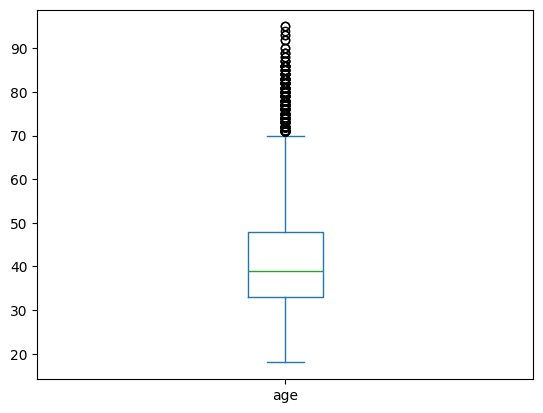

In [11]:
data_num["age"].plot(kind='box')


<Axes: >

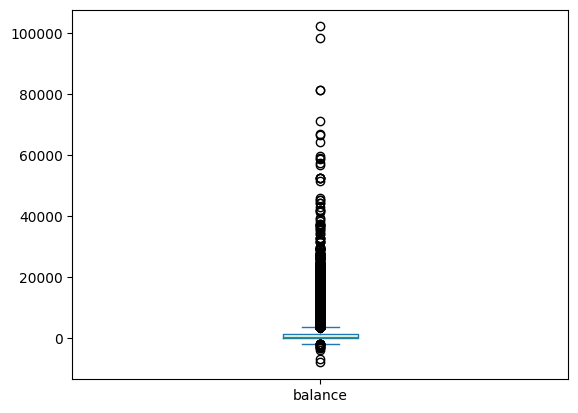

In [12]:
data_num["balance"].plot(kind='box')

<Axes: >

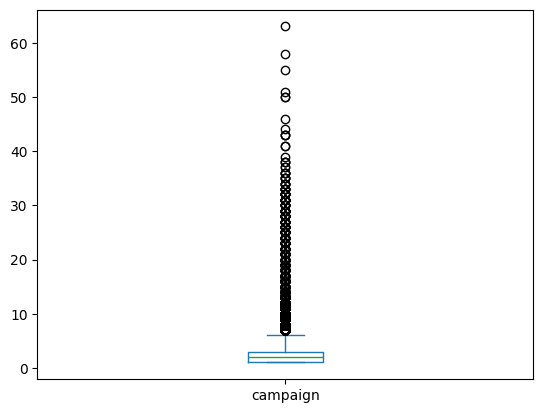

In [13]:
data_num["campaign"].plot(kind='box')

<Axes: >

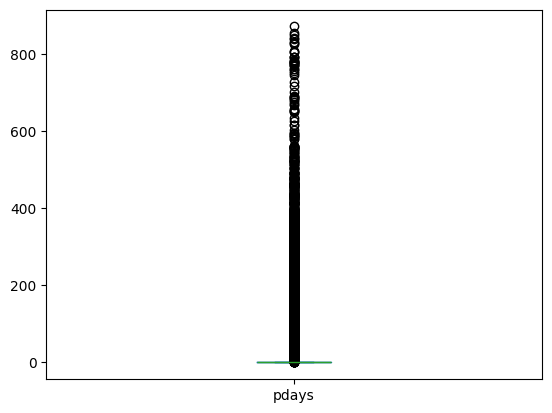

In [14]:
data_num["pdays"].plot(kind='box')

<Axes: >

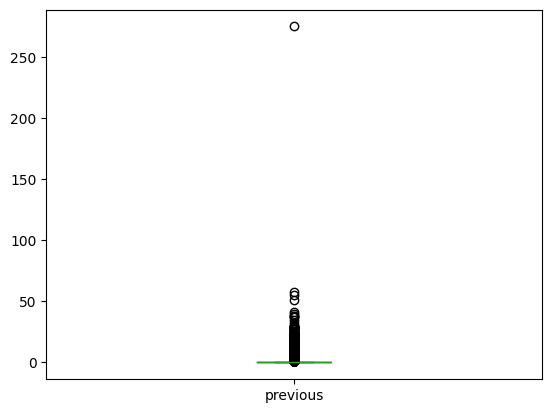

In [15]:
data_num["previous"].plot(kind='box')

visto esto, no se borraran atipicos de pdays pues hay una cantidad continua de datos hasta el limite superior. Para previous se pondra un limite de datos en 50 al ser donde termina la existencia recurrente de datos. Por esta misma razon, campaign se limitara a 40. Para Age y Balance tomaremos un maximo de 3 desviaciones estandar sobre la media



In [16]:
# Calcular media y desviación estándar
media_age = data['age'].mean()
desviacion_estandar_age = data['age'].std()

media_balance = data['balance'].mean()
desviacion_estandar_balance = data['balance'].std()

# Definir los límites
limite_inferior_age = media_age - 3 * desviacion_estandar_age
limite_superior_age = media_age + 3 * desviacion_estandar_age

limite_inferior_balance = media_balance - 3 * desviacion_estandar_balance
limite_superior_balance = media_balance + 3 * desviacion_estandar_balance

# Filtrar los datos dentro de los límites
data_no_outliers = data[(data['age'] >= limite_inferior_age) & (data['age'] <= limite_superior_age)]
data_no_outliers = data_no_outliers[(data['balance'] >= limite_inferior_balance) & (data['balance'] <= limite_superior_balance)]
data_no_outliers = data_no_outliers[(data['previous'] <= 50)]
data_no_outliers = data_no_outliers[(data['campaign'] <= 50)]

print("Datos sin atípicos:")
print(data_no_outliers)


Datos sin atípicos:
       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  du

C:\Users\juanr\AppData\Local\Temp\ipykernel_14104\1870943231.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_no_outliers = data_no_outliers[(data['balance'] >= limite_inferior_balance) & (data['balance'] <= limite_superior_balance)]
C:\Users\juanr\AppData\Local\Temp\ipykernel_14104\1870943231.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_no_outliers = data_no_outliers[(data['previous'] <= 50)]
C:\Users\juanr\AppData\Local\Temp\ipykernel_14104\1870943231.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_no_outliers = data_no_outliers[(data['campaign'] <= 50)]


<Axes: >

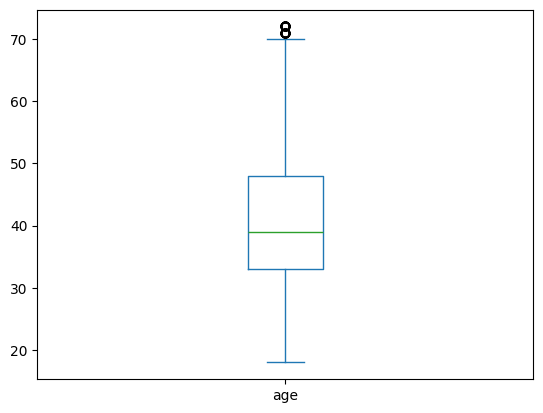

In [17]:
data_no_outliers["age"].plot(kind='box')

## 1.3: Cambio de variables categoricas para facildiad de analisis

Primero cambiamos las varibales binarias por 0s y 1s, luego las otras variables categoricas con metodo HotEncoder

In [18]:
data_clean = data_no_outliers
data_clean[["default", "housing","loan", "y"]] = data_clean[["default", "housing","loan", "y"]].apply(lambda x: x.map({"yes":1, "no": 0}))

## 1.4. Bases de datos limpias
data_clean es una base de datos limpia en tanto a outliers, duplicados y faltantes. En esta base de datos las variables categoricas binarias (yes or no) estan en formato binario (1 = yes, 0 = no)
data_transformada corresponde a la base de datos, realizando cambios a las variables categoricas por metodo Hot Encoder. Esta base de datos no se recomienda para vizualizaciones pero si para modelos de redes neuronales.

In [19]:
## Exportar la base de datos de vizualizaciones a csv para facilidad de manejo
data_clean.to_csv('data_clean.csv', index=False)

## **PARTE 2: Exploracion de datos**

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

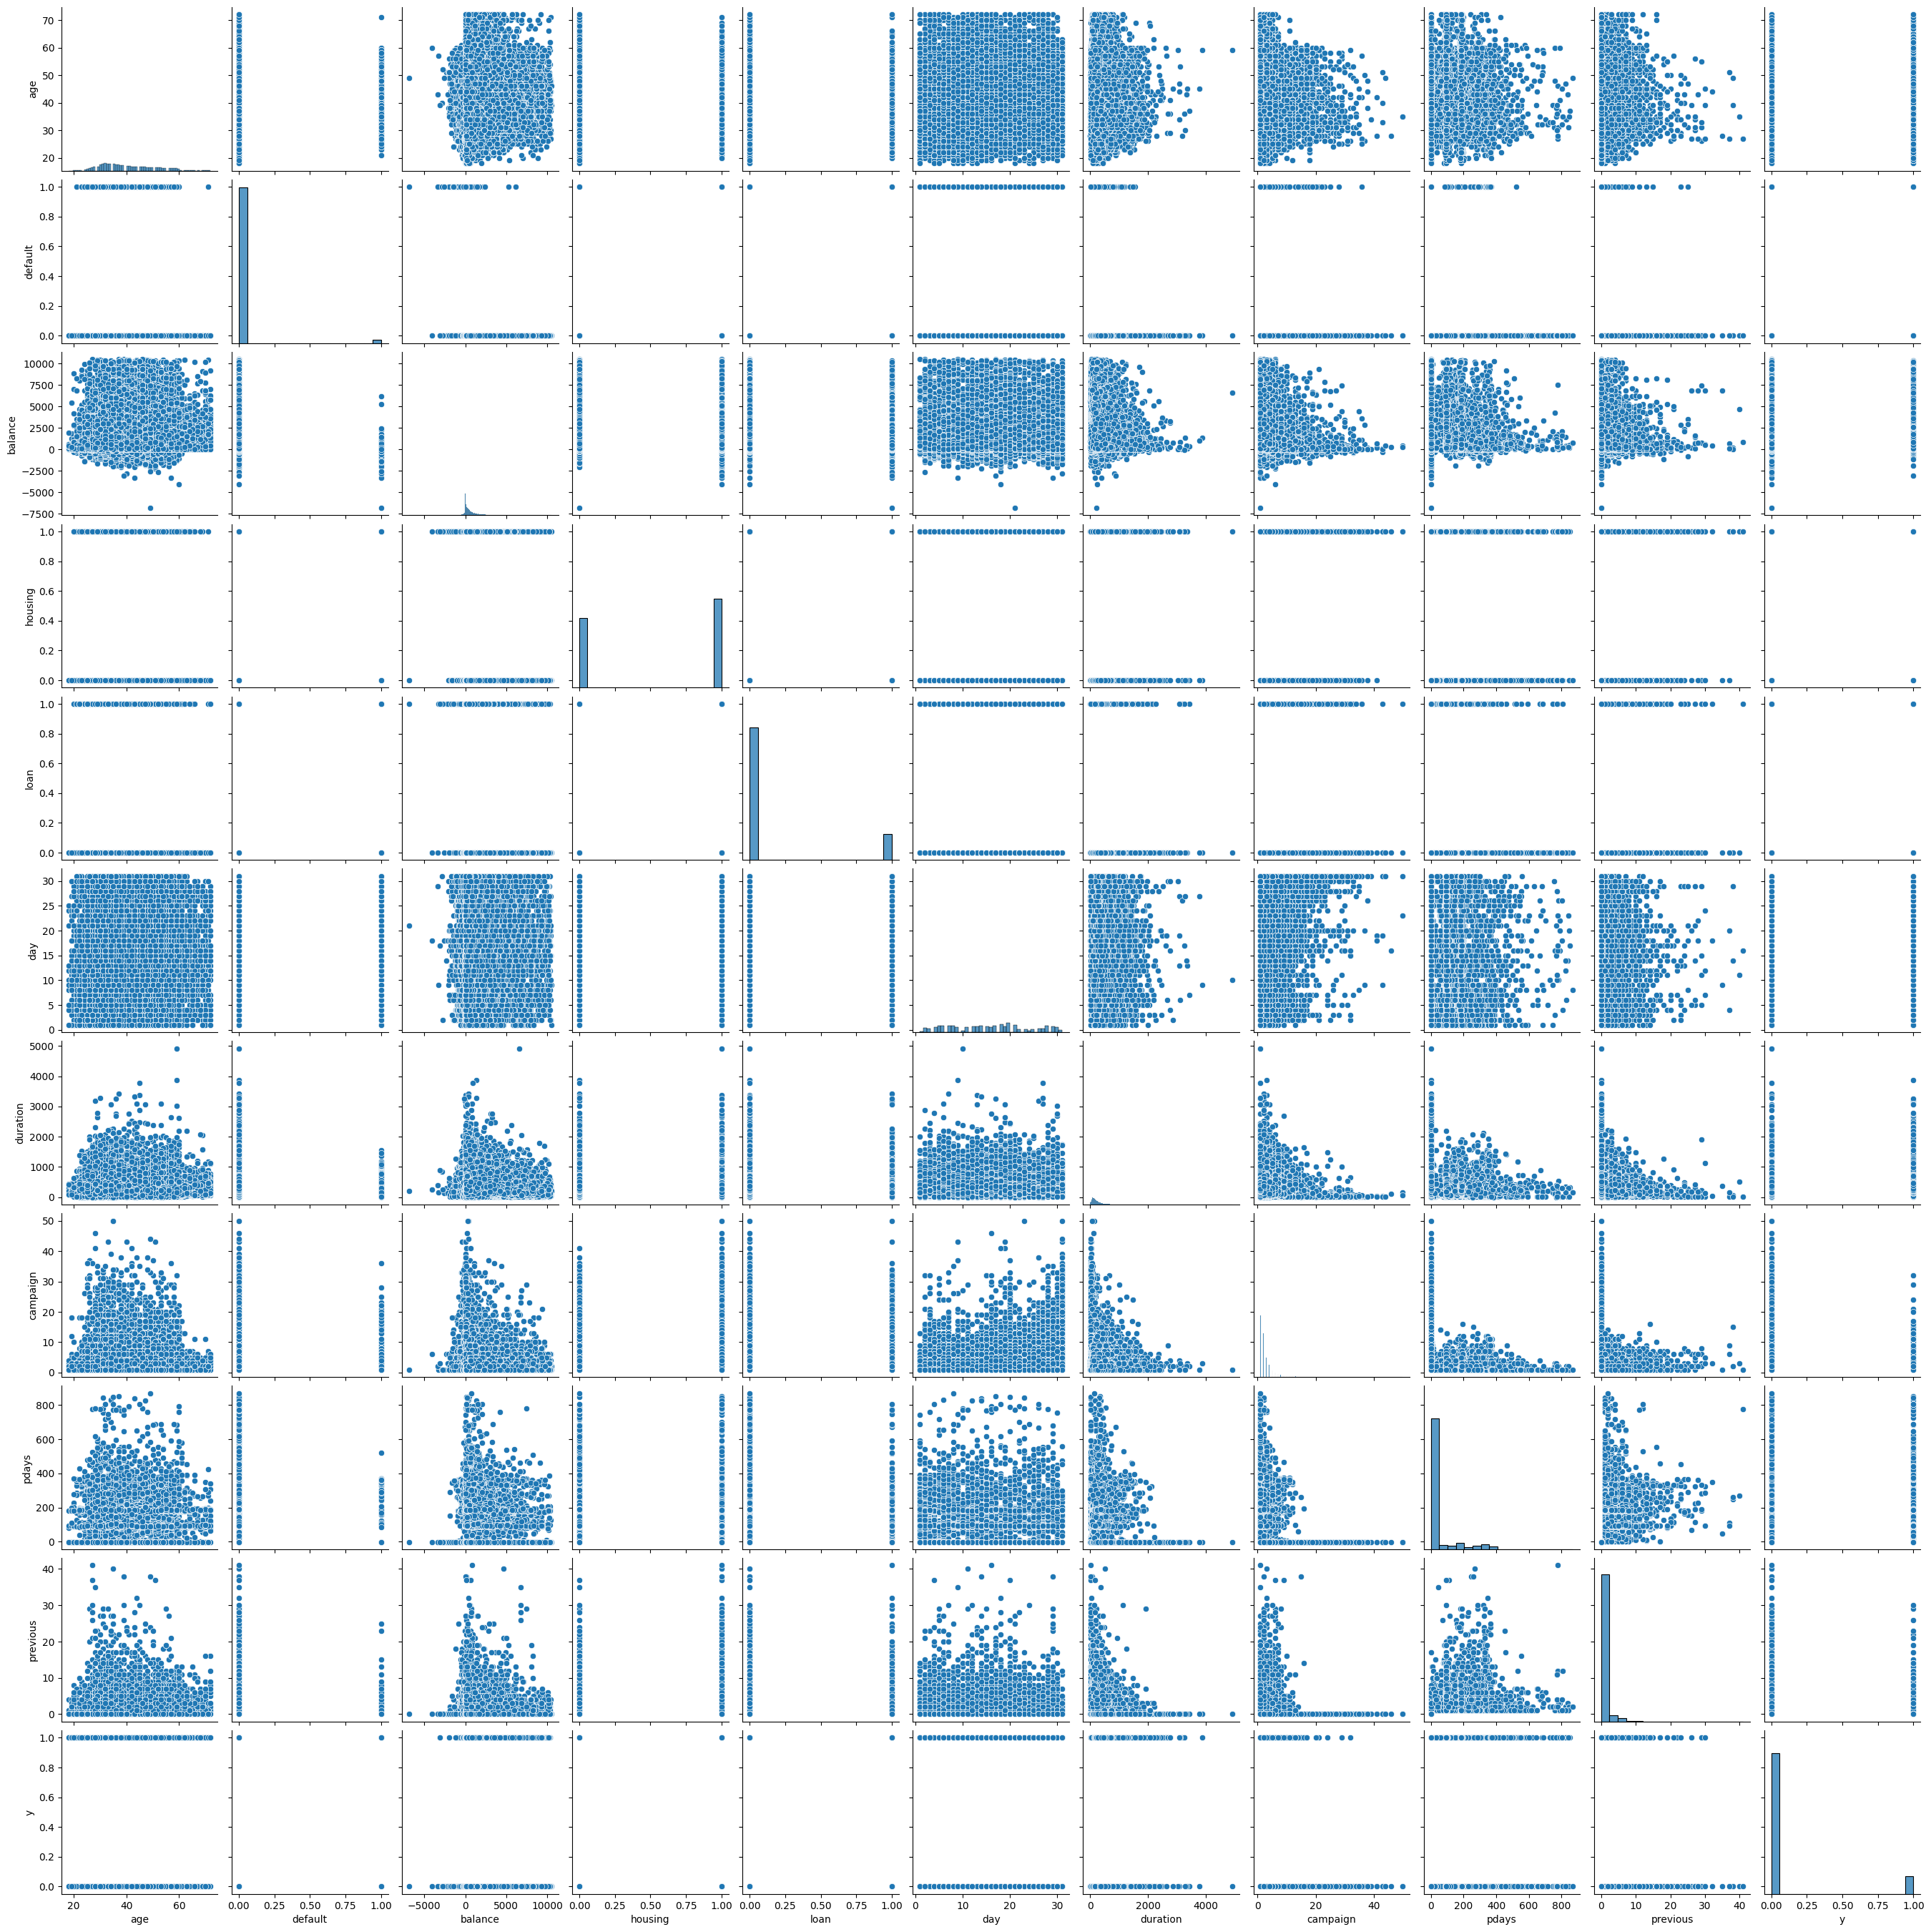

In [21]:
sns.pairplot(data_clean)

<Axes: >

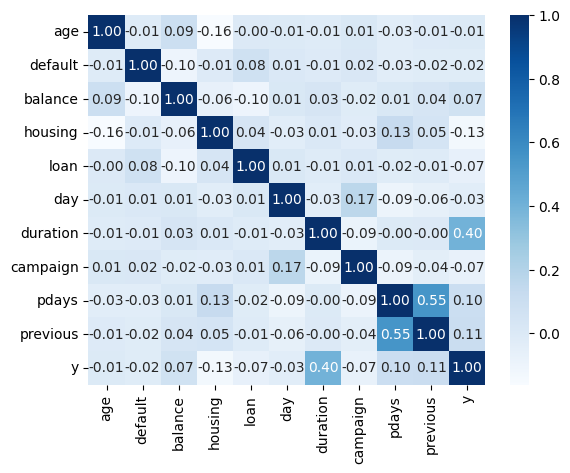

In [22]:
features = ["age", "default", "balance", "housing", "loan", "day", "duration","campaign", "pdays", "previous", "y"]
data_numeric = data_clean[features]
corr = data_numeric.corr()
sns.heatmap(corr, cmap="Blues", annot=True, fmt=".2f")

In [23]:
data_clean.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [24]:
columnas_numericas = ["age", "default", "balance", "housing", "loan", "day", "duration","campaign", "pdays", "previous", "y"]   
columnas_categoricas = ["job", "marital", "education", "contact", "month", "poutcome"] 

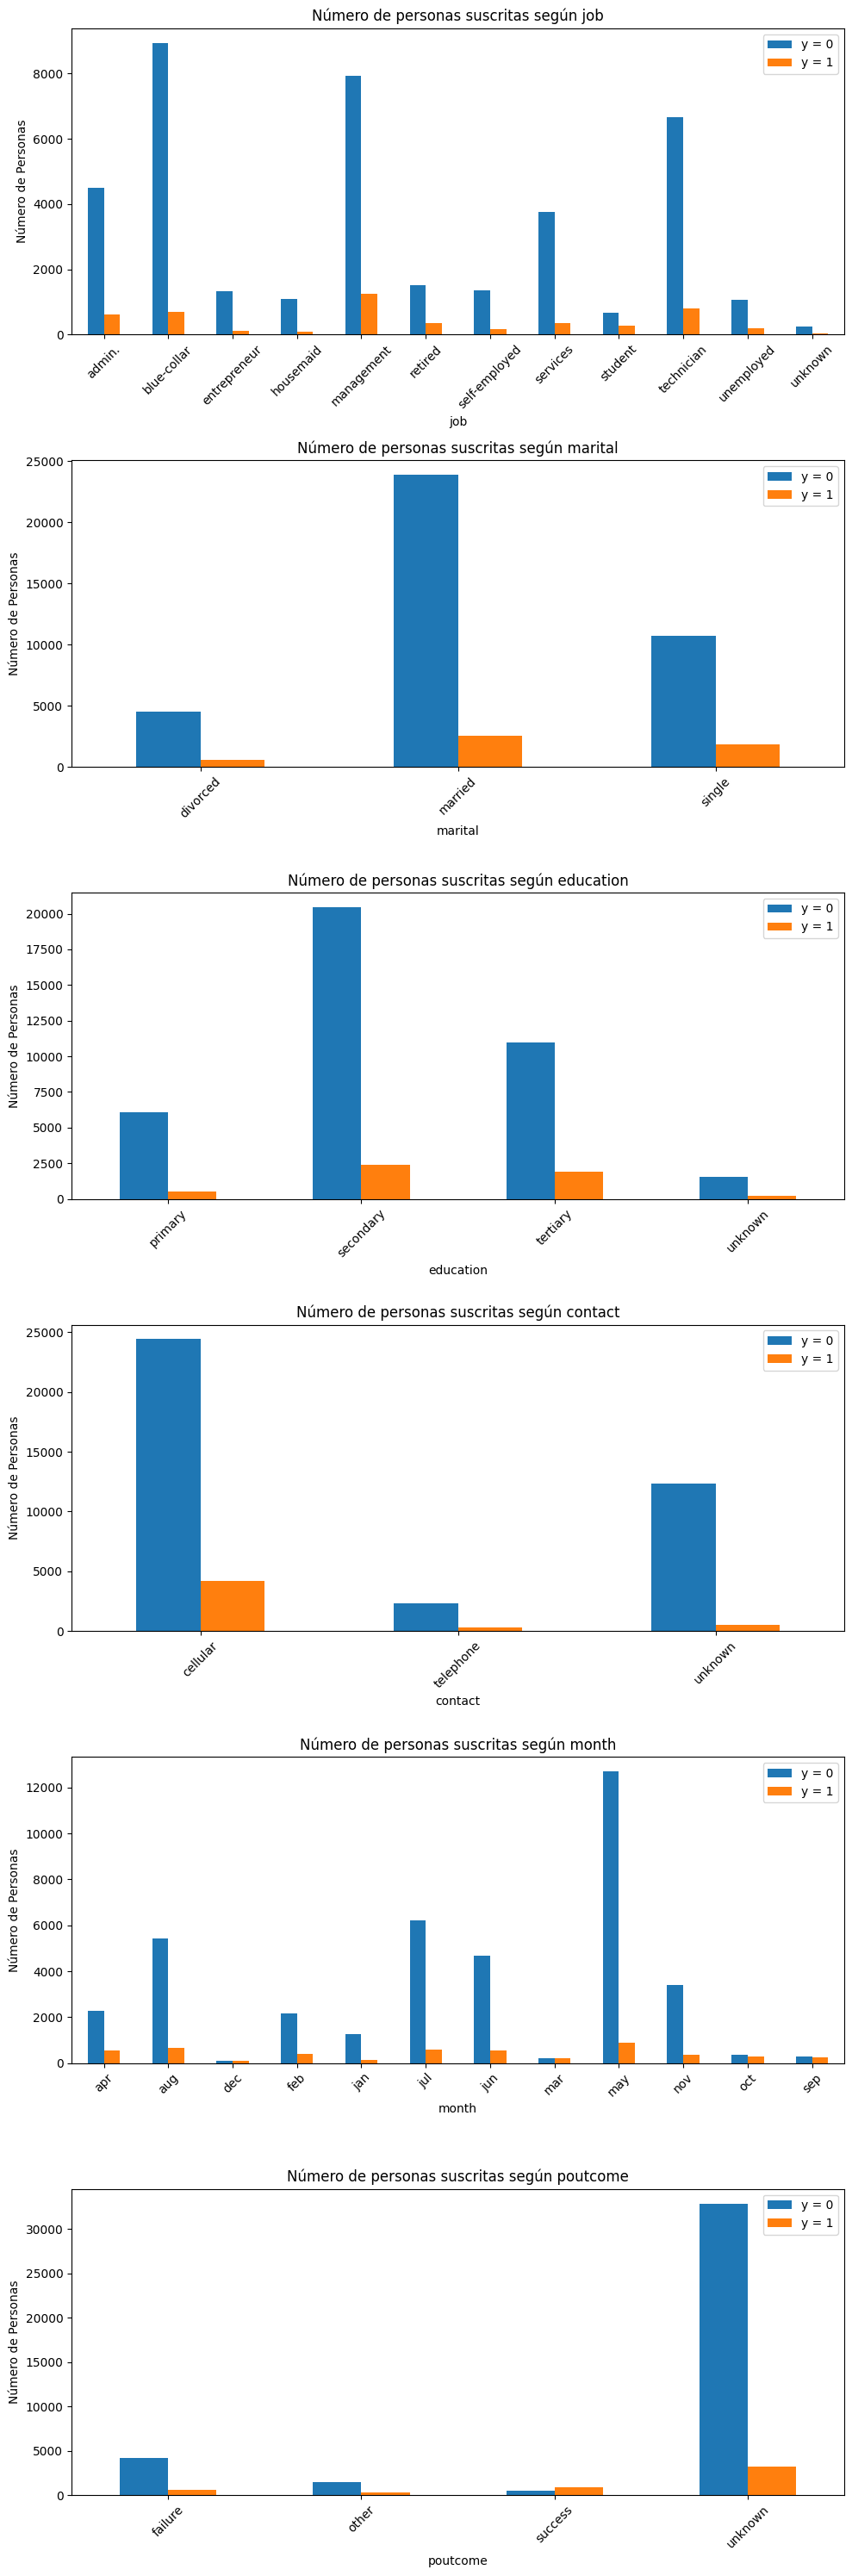

In [25]:
# Configuración de tamaño de los subplots
fig, axes = plt.subplots(nrows=len(columnas_categoricas), ncols=1, figsize=(10, len(columnas_categoricas) * 5))

# Generar una gráfica para cada columna categórica
for i, col in enumerate(columnas_categoricas):
    # Agrupamos por la columna categórica y 'y', luego contamos el número de ocurrencias
    conteo_y_por_columna = data_clean.groupby([col, 'y']).size().unstack()
    
    # Gráfica de barras para cada característica
    conteo_y_por_columna.plot(kind='bar', ax=axes[i], color=['#1f77b4', '#ff7f0e'])
    axes[i].set_title(f'Número de personas suscritas según {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Número de Personas')
    axes[i].legend(['y = 0', 'y = 1'])
    axes[i].tick_params(axis='x', rotation=45)

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

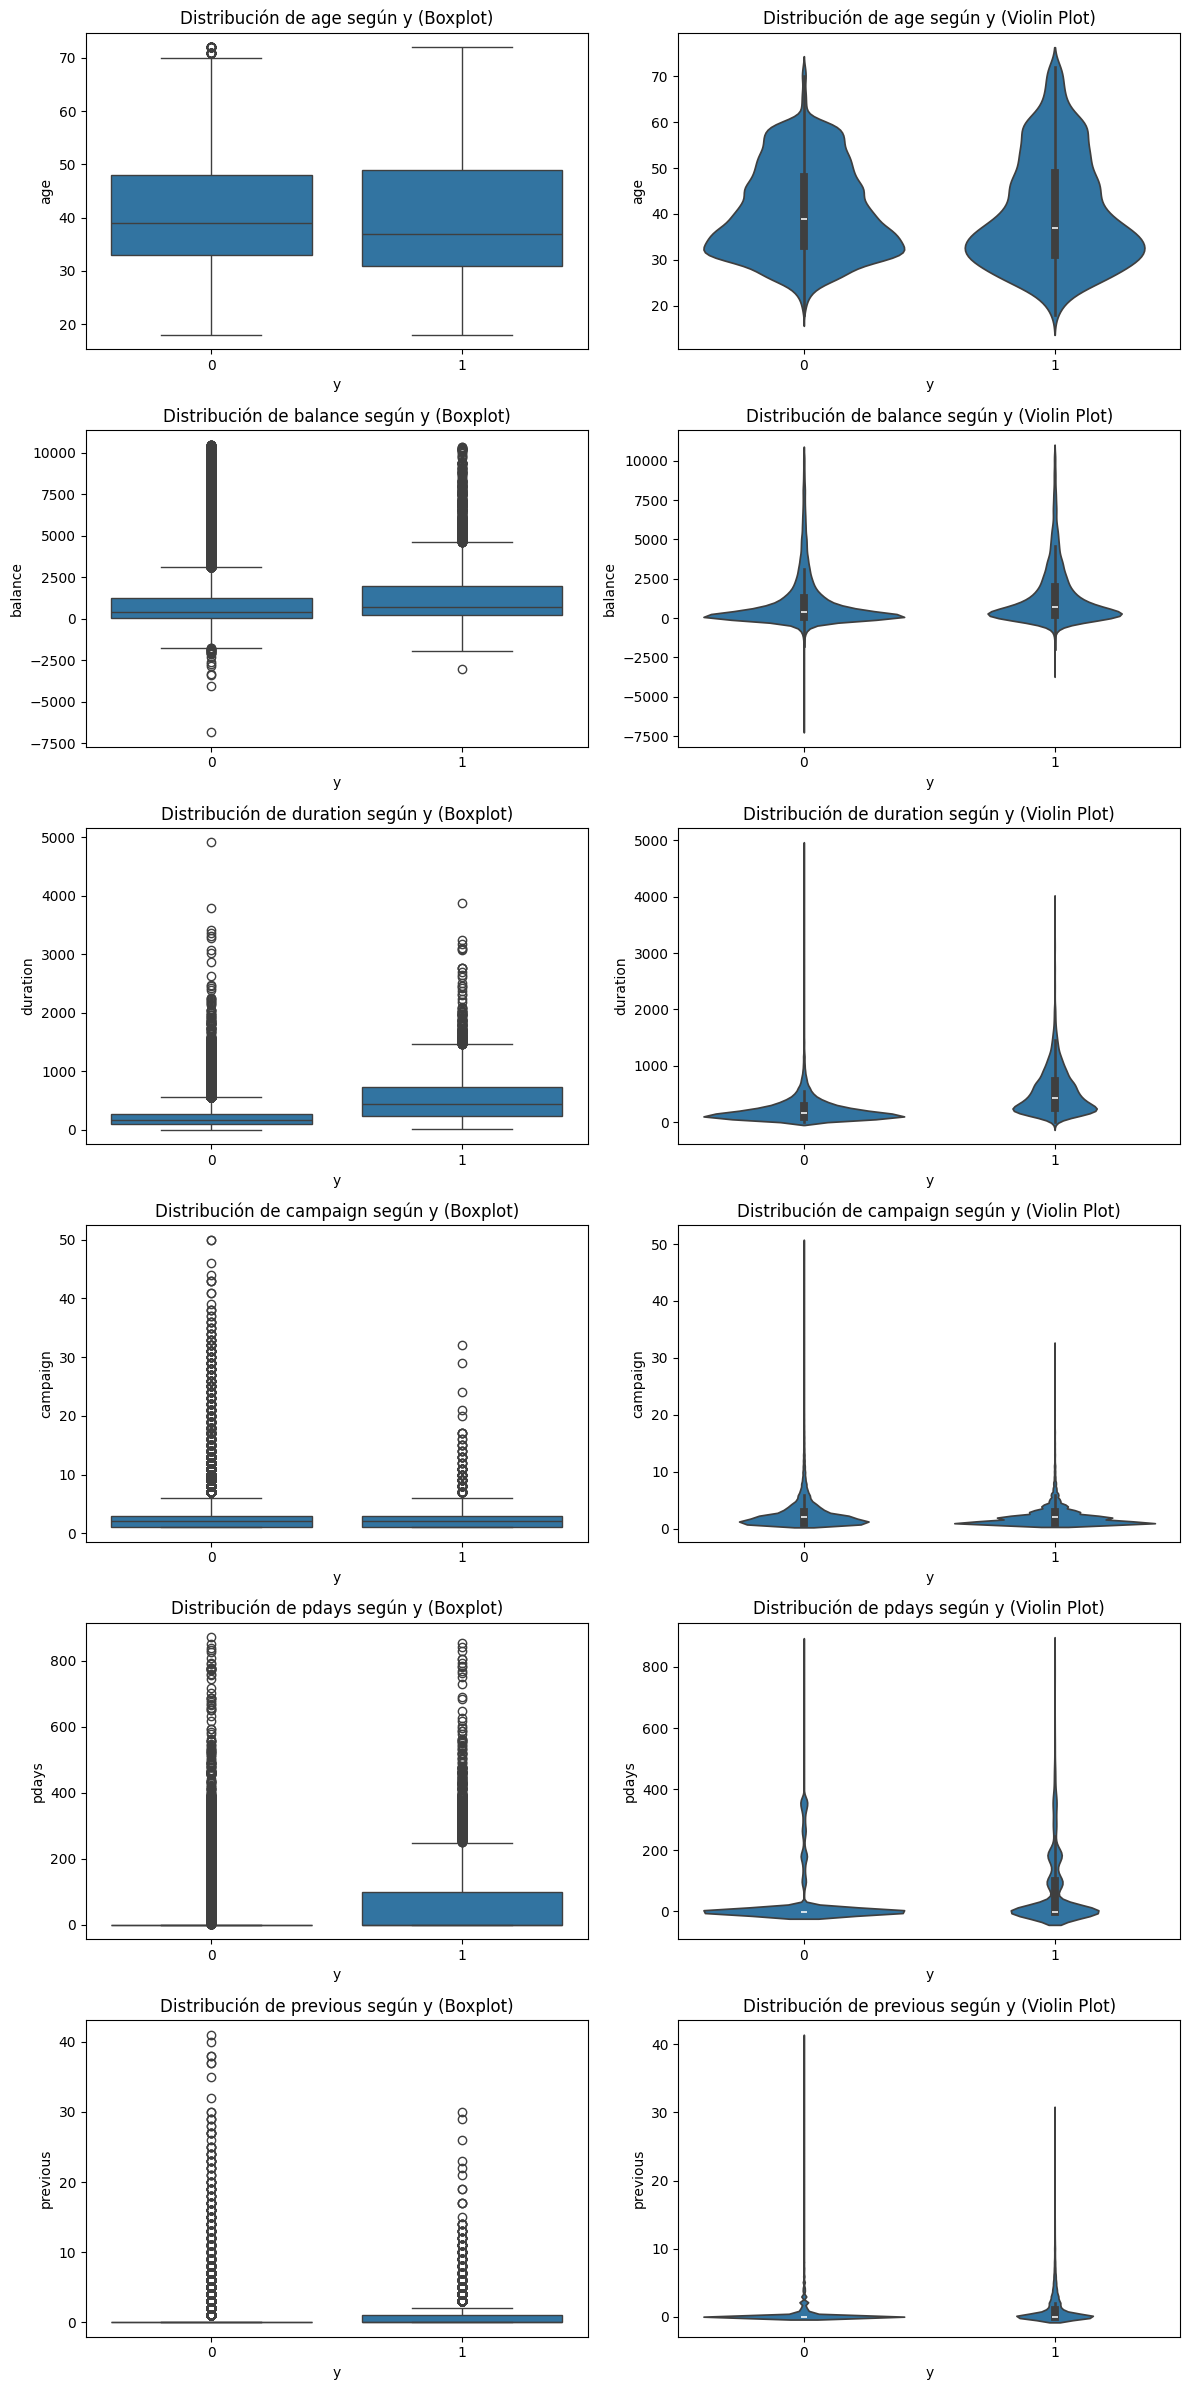

In [26]:
#creamos una lista de columnas continuas
columnas_continuas = ["age", "balance", "duration","campaign", "pdays", "previous"] 

# Configuración de gráficos
fig, axes = plt.subplots(len(columnas_continuas), 2, figsize=(12, len(columnas_continuas) * 4))

# Graficamos boxplot y violin plot para cada columna numérica
for i, col in enumerate(columnas_continuas):
    # Boxplot
    sns.boxplot(data=data_clean, x='y', y=col, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribución de {col} según y (Boxplot)')
    axes[i, 0].set_xlabel('y')
    axes[i, 0].set_ylabel(col)
    
    # Violin plot
    sns.violinplot(data=data_clean, x='y', y=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'Distribución de {col} según y (Violin Plot)')
    axes[i, 1].set_xlabel('y')
    axes[i, 1].set_ylabel(col)

# Ajuste del layout
plt.tight_layout()
plt.show()

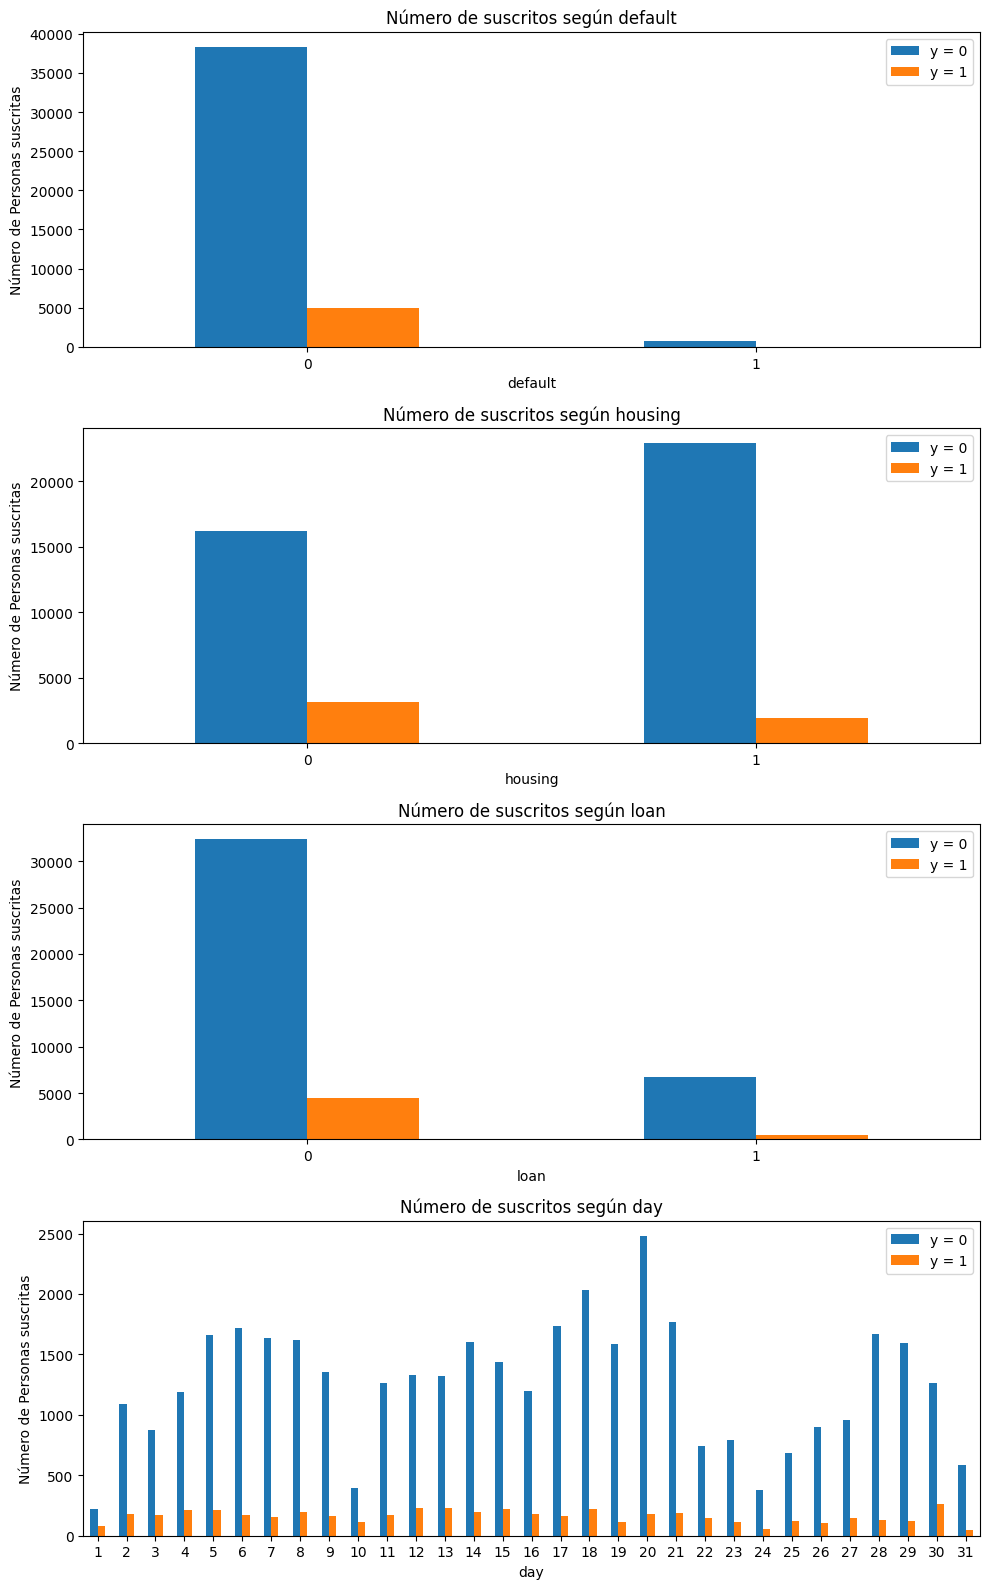

In [27]:
columnas_binarias = ["default","housing", "loan","day"]  
# Configuración de tamaño de los subplots
fig, axes = plt.subplots(nrows=len(columnas_binarias), ncols=1, figsize=(10, len(columnas_binarias) * 4))

# Generar una gráfica para cada columna binaria
for i, col in enumerate(columnas_binarias):
    # Agrupamos por la columna binaria y 'y' y contamos el número de ocurrencias
    conteo_y_por_binaria = data_clean.groupby([col, 'y']).size().unstack()
    
    # Gráfica de barras para cada característica binaria
    conteo_y_por_binaria.plot(kind='bar', ax=axes[i], color=['#1f77b4', '#ff7f0e'])
    axes[i].set_title(f'Número de suscritos según {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Número de Personas suscritas')
    axes[i].legend(['y = 0', 'y = 1'])
    axes[i].tick_params(axis='x', rotation=0)

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

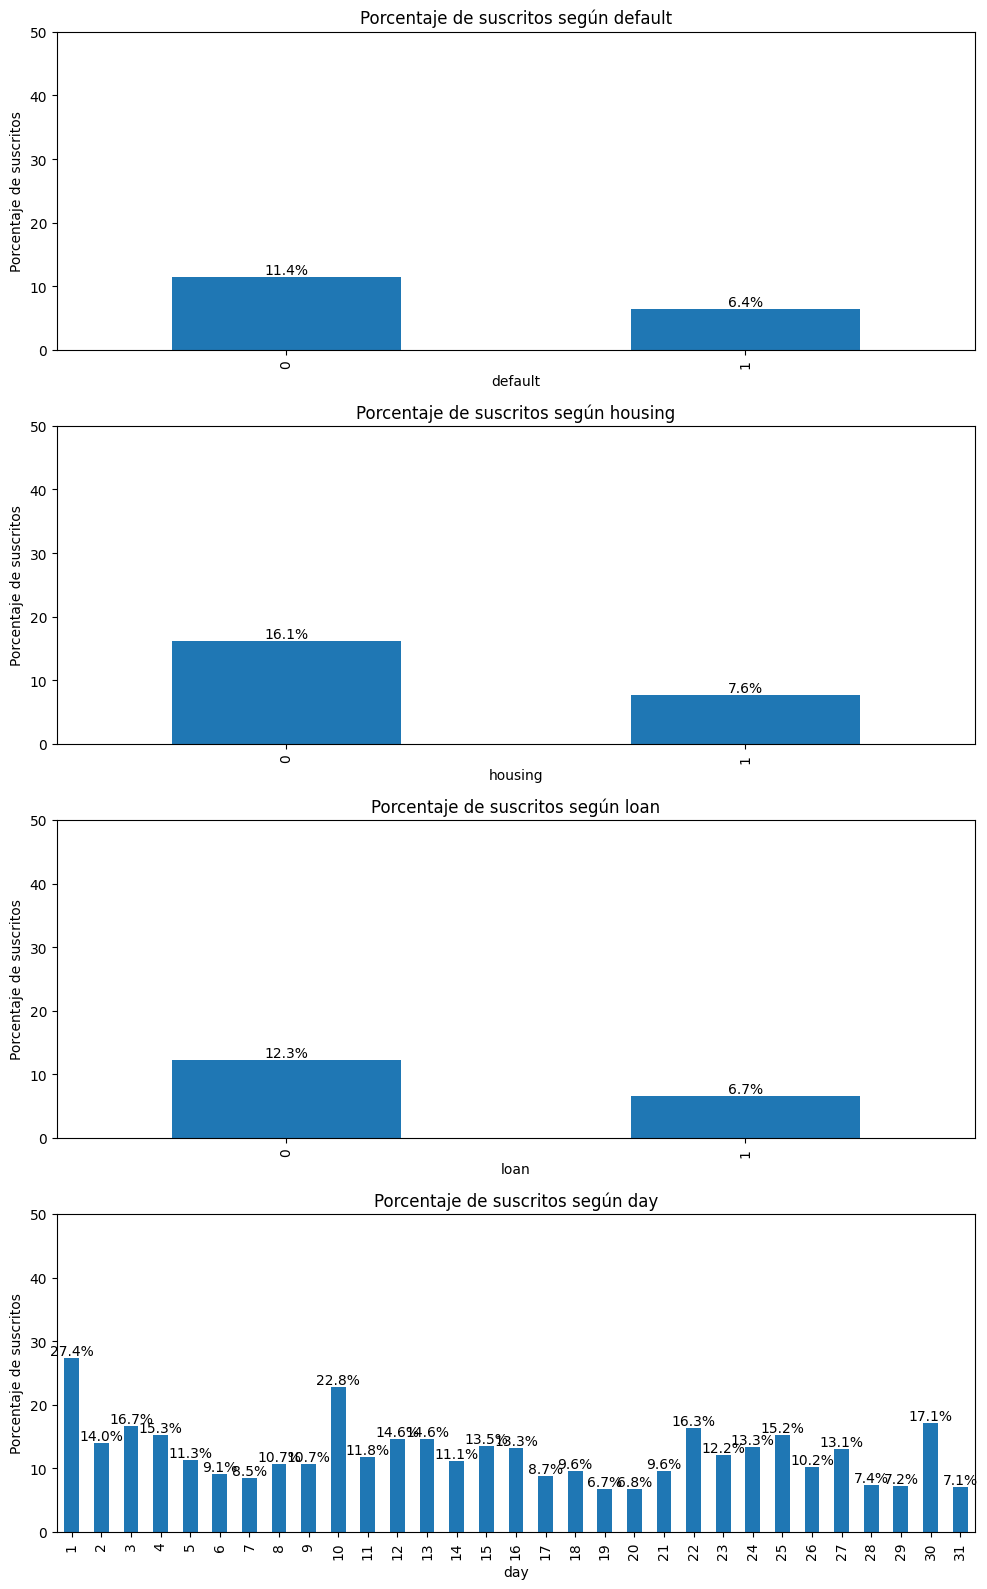

In [28]:
# Configuración de gráficos
fig, axes = plt.subplots(nrows=len(columnas_binarias), ncols=1, figsize=(10, len(columnas_binarias) * 4))

# Generar un gráfico para cada columna binaria
for i, col in enumerate(columnas_binarias):
    # Agrupamos por la columna binaria y 'y' y calculamos el tamaño del grupo
    conteo = data_clean.groupby([col, 'y']).size().unstack()
    
    # Calculamos el porcentaje de y = 1 en cada categoría de la columna binaria
    porcentaje_y_1 = (conteo[1] / conteo.sum(axis=1)) * 100
    
    # Graficamos el porcentaje
    ax = porcentaje_y_1.plot(kind='bar', ax=axes[i], color='#1f77b4')
    axes[i].set_title(f'Porcentaje de suscritos según {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Porcentaje de suscritos')
    axes[i].set_ylim(0, 50)  # Escala de 0 a 100 para el porcentaje

    # Añadir etiquetas de porcentaje encima de cada barra con un pequeño ajuste
# Añadir etiquetas de porcentaje encima de cada barra
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom')

# Ajuste del layout
plt.tight_layout()
plt.show()

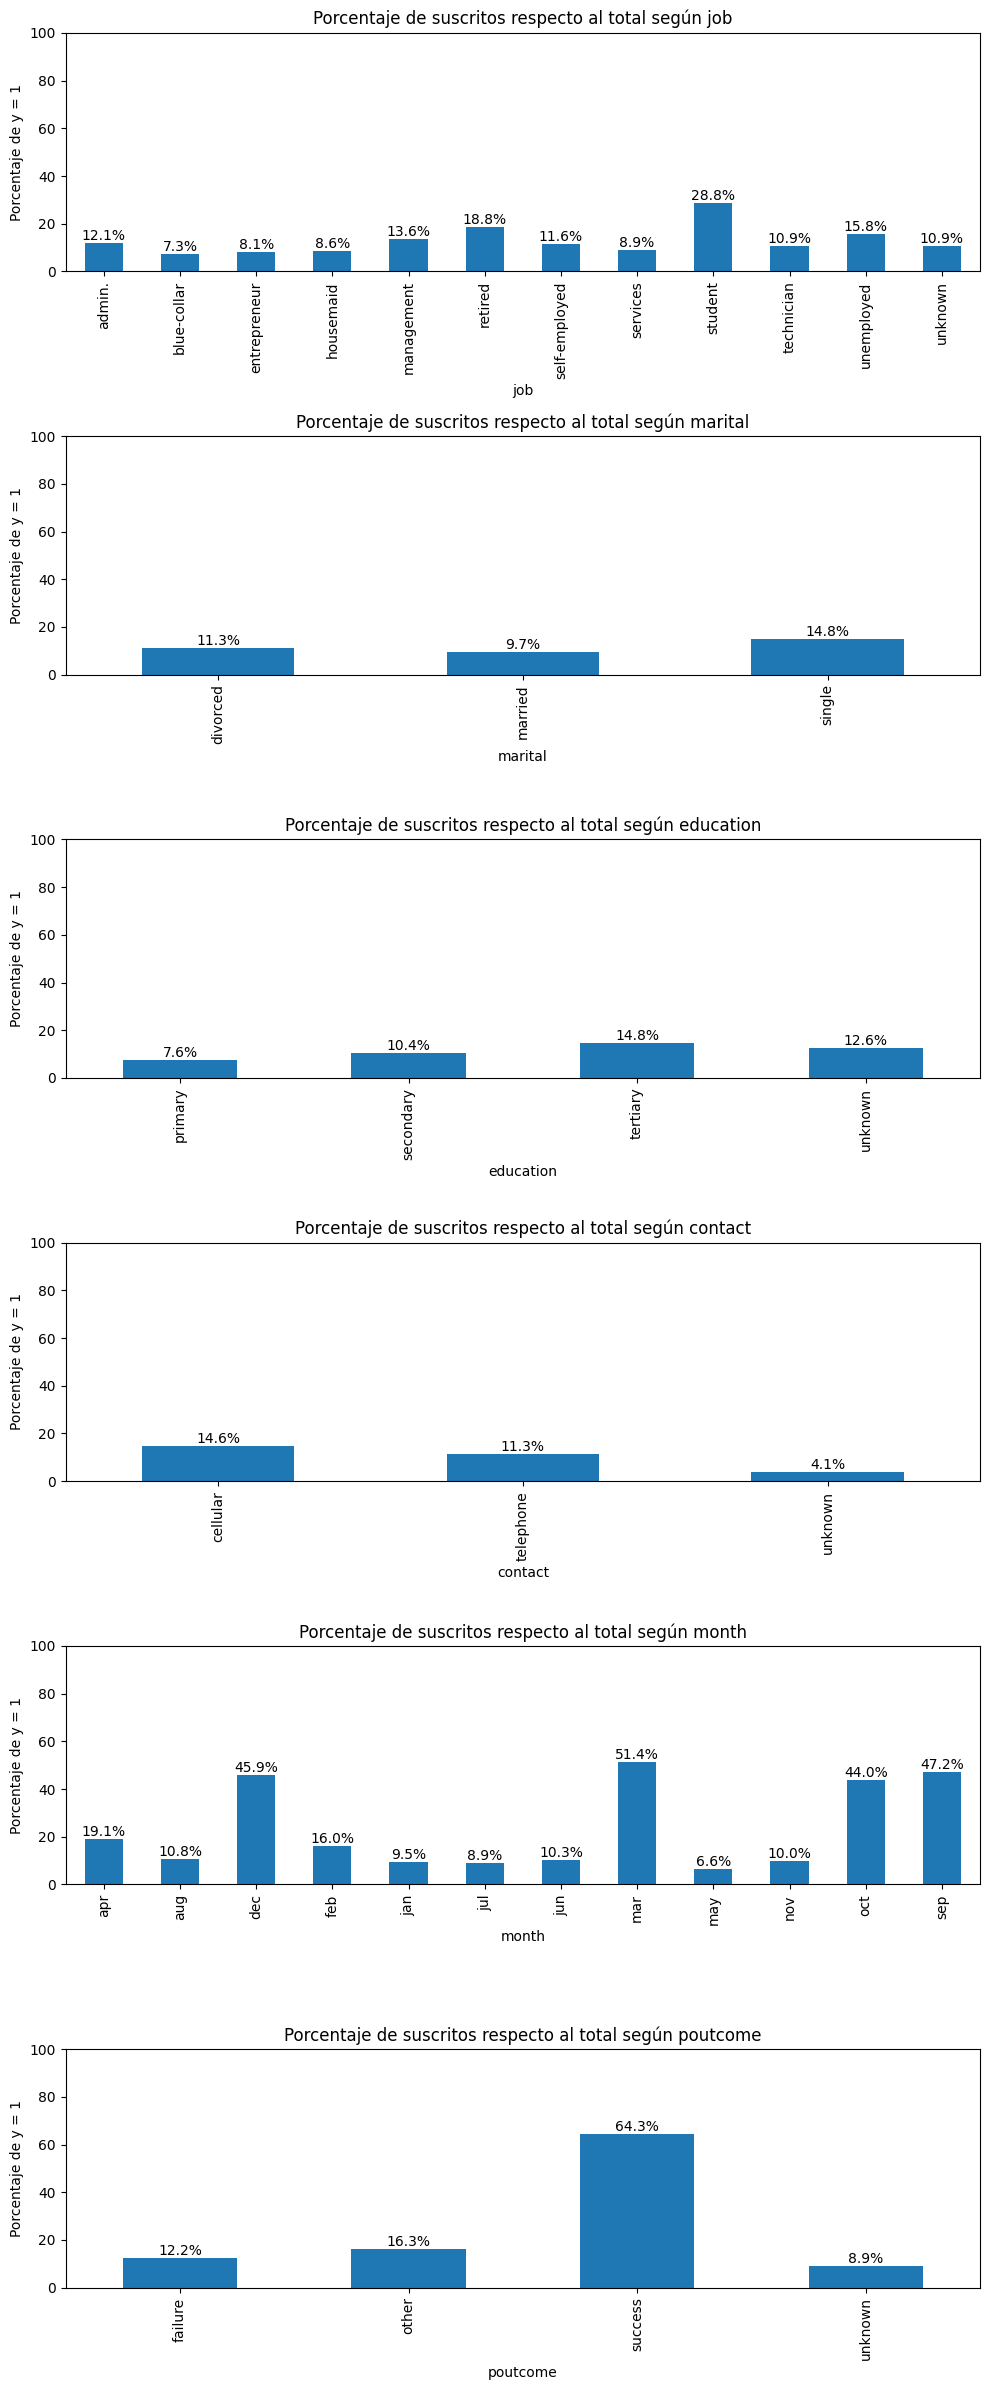

In [29]:
# Configuración de gráficos
fig, axes = plt.subplots(nrows=len(columnas_categoricas), ncols=1, figsize=(10, len(columnas_categoricas) * 4))

# Generar un gráfico para cada columna binaria
for i, col in enumerate(columnas_categoricas):
    # Agrupamos por la columna binaria y 'y' y calculamos el tamaño del grupo
    conteo = data_clean.groupby([col, 'y']).size().unstack()
    
    # Calculamos el porcentaje de y = 1 en cada categoría de la columna binaria
    porcentaje_y_1 = (conteo[1] / conteo.sum(axis=1)) * 100
    
    # Graficamos el porcentaje
    ax = porcentaje_y_1.plot(kind='bar', ax=axes[i], color='#1f77b4')
    axes[i].set_title(f'Porcentaje de suscritos respecto al total según {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Porcentaje de y = 1')
    axes[i].set_ylim(0, 100)  # Escala de 0 a 100 para el porcentaje

    # Añadir etiquetas de porcentaje encima de cada barra
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom')

# Ajuste del layout
plt.tight_layout()
plt.show()

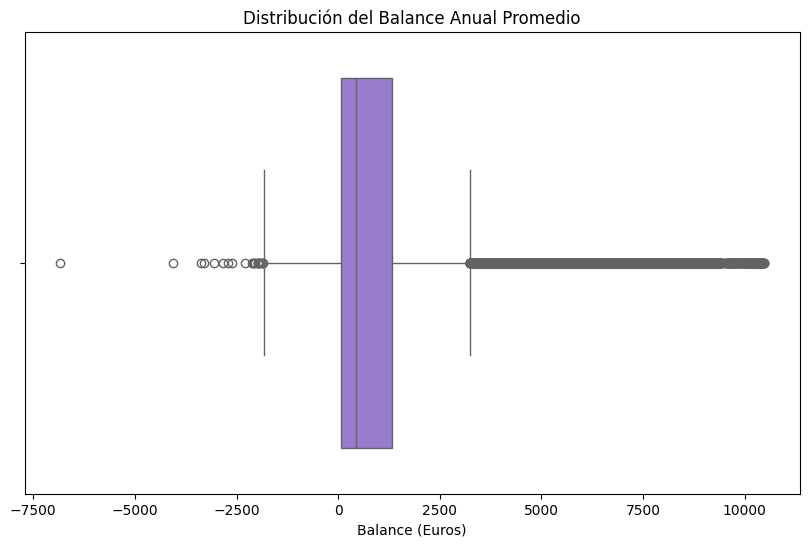

In [30]:
# Gráfico de caja para el balance de ingresos
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_clean['balance'], color='mediumpurple')
plt.title('Distribución del Balance Anual Promedio')
plt.xlabel('Balance (Euros)')
plt.show()

C:\Users\juanr\AppData\Local\Temp\ipykernel_14104\173479856.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='duration', data=df_successful, estimator='mean', ci=None, label='Duración Promedio (s)', marker='o', sort=False)
C:\Users\juanr\AppData\Local\Temp\ipykernel_14104\173479856.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='balance', data=df_successful, estimator='mean', ci=None, label='Saldo Promedio (€)', marker='o', sort=False)


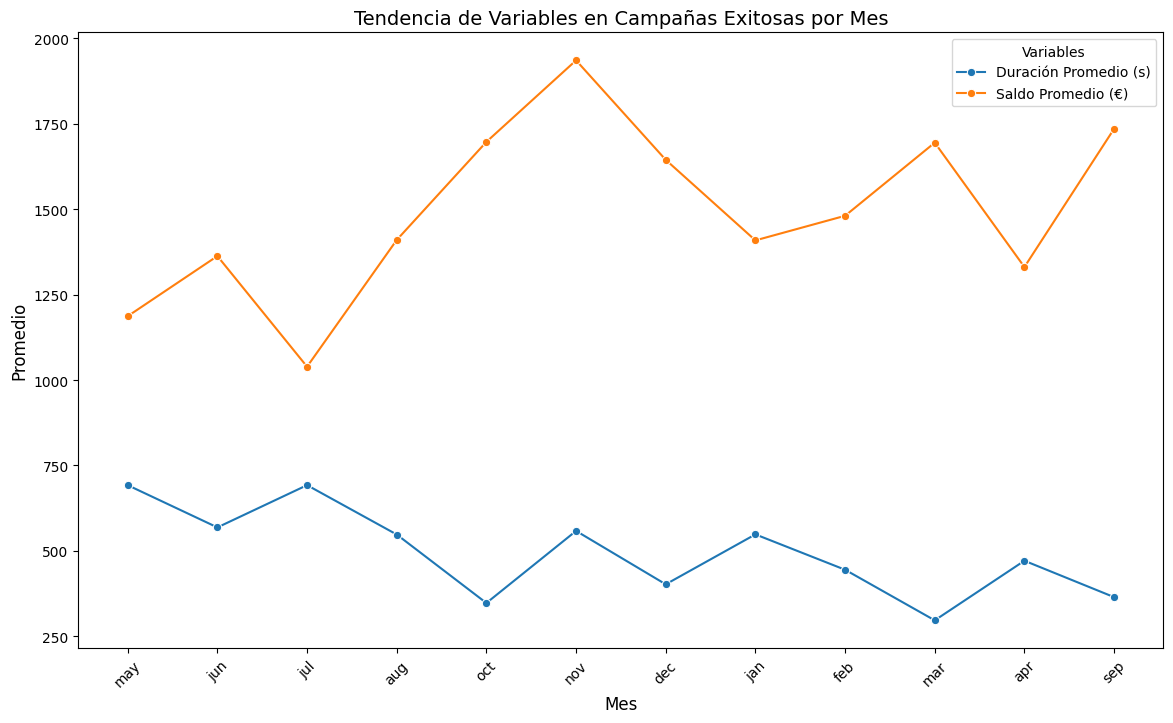

In [31]:
# Filtrar solo las campañas exitosas (cuando y = 1)
df_successful = data_clean[data_clean['y'] == 1]

# Configurar el tamaño de la figura
plt.figure(figsize=(14, 8))

# Asegurarnos de que el eje 'month' esté ordenado cronológicamente
order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Gráfico de líneas para la duración promedio de la llamada por mes
sns.lineplot(x='month', y='duration', data=df_successful, estimator='mean', ci=None, label='Duración Promedio (s)', marker='o', sort=False)

# Gráfico de líneas para el saldo promedio por mes
sns.lineplot(x='month', y='balance', data=df_successful, estimator='mean', ci=None, label='Saldo Promedio (€)', marker='o', sort=False)

# Configurar títulos y etiquetas
plt.title('Tendencia de Variables en Campañas Exitosas por Mes', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Promedio', fontsize=12)
plt.legend(title='Variables', fontsize=10)
plt.xticks(rotation=45)
plt.show()


## **PARTE 3: MODELAMIENTO**

## 3.1: Creacion de transformador y seleccion de datos de entrenamiento 

separamos los datos que si se usaran en el modelo de los que no. Adicional, creamos el data set y y el dataset x

In [32]:
data_used = data_clean[["duration", "pdays","job", "education", "month", "poutcome", "default", "housing", "loan", "y"]]
x = data_clean.drop('y', axis=1) # Separación de las variables predictoras
y = data_clean['y'] # Separación de la variable objetivo

In [33]:
## identificamos categoricas y numericas

columnas_numericas = ["age", "default", "balance", "housing", "loan", "day", "duration","campaign", "pdays", "previous"]  
columnas_categoricas = ["job", "marital", "education", "contact", "month", "poutcome"] 
## hacemos el preprocesamiento de los datos
preprocesador = ColumnTransformer(transformers=[('num', StandardScaler(), columnas_numericas), 
                                                ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), 
                                                 columnas_categoricas)])

In [34]:
# Dividir los datos entre entrenamiento y prueba (80% y 20% respectivamente)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=17, stratify=y)

X_train_preparado = preprocesador.fit_transform(X_train)
X_test_preparado = preprocesador.transform(X_test)

encoder = preprocesador.named_transformers_['cat']
categorias = encoder.categories_
for idx, cat in enumerate(columnas_categoricas):
    print(f"Categorías en {cat}: {categorias[idx]}")

print(f"Forma de los datos de entrenamiento preparados: {X_train_preparado.shape}")
print(f"Forma de los datos de prueba preparados: {X_test_preparado.shape}")

Categorías en job: ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
Categorías en marital: ['divorced' 'married' 'single']
Categorías en education: ['primary' 'secondary' 'tertiary' 'unknown']
Categorías en contact: ['cellular' 'telephone' 'unknown']
Categorías en month: ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
Categorías en poutcome: ['failure' 'other' 'success' 'unknown']
Forma de los datos de entrenamiento preparados: (35268, 48)
Forma de los datos de prueba preparados: (8818, 48)


## 3.2 Modelo Base

In [35]:
input_shape = X_train_preparado.shape[1]
modelo_base = models.Sequential([
    layers.Dense(25, activation='relu', input_shape=(input_shape,)),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='relu')]) 

modelo_base.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Compilación del modelo

c:\Users\juanr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


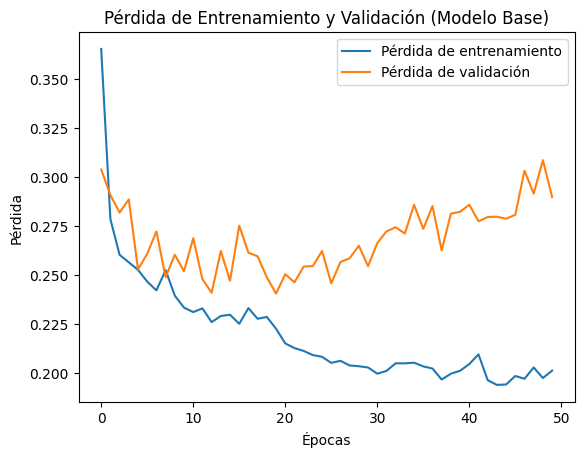

In [36]:
historia_base = modelo_base.fit(X_train_preparado, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=0)

# Gráfica de la pérdida de entrenamiento y validación
plt.plot(historia_base.history['loss'], label='Pérdida de entrenamiento')
plt.plot(historia_base.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de Entrenamiento y Validación (Modelo Base)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [37]:
PrecioProd = 10
CostoProd = 5
total_data = 44086

In [38]:
threshold = 0.5
y_pred = (modelo_base.predict(X_test_preparado) > threshold).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
Ingreso = ((PrecioProd - CostoProd)* tp - CostoProd*fp - PrecioProd*fn)/total_data

# Crear un DataFrame para almacenar las métricas
resultados = pd.DataFrame({
    'Modelo': ['Modelo Base'],  # Nombre del modelo
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    "Ingreso":[Ingreso]
})

# Mostrar el DataFrame
print(resultados)

276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
        Modelo  Accuracy  Precision  Recall  F1 Score   Ingreso
0  Modelo Base  0.904627    0.62212   0.405  0.490612 -0.116931


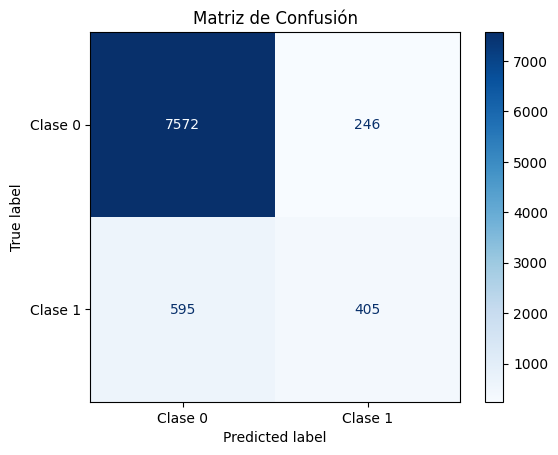

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Supongamos que ya tienes tus probabilidades de predicción y las etiquetas verdaderas
y_test = np.array(y_test)  # Sustituye con tus etiquetas verdaderas (0 y 1)
y_prob = np.array(y_pred)  # Sustituye con las probabilidades predichas por tu modelo

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Clase 0', 'Clase 1'])  # Cambia las etiquetas según tus clases
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()



## 3.3 Alternativas de modelos


mejor optimizador


In [40]:
##Mejor optimizador
for opt in ['sgd', 'rmsprop']:
    modelo_alt = models.Sequential([
    layers.Dense(25, activation='relu', input_shape=(input_shape,)),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='relu')]) 

    modelo_alt.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    modelo_alt.fit(X_train_preparado, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=0)
    y_pred_alt = (modelo_alt.predict(X_test_preparado) > 0.5).astype("int32")

    accuracy = accuracy_score(y_test, y_pred_alt)
    precision = precision_score(y_test, y_pred_alt)
    recall = recall_score(y_test, y_pred_alt)
    f1 = f1_score(y_test, y_pred_alt)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_alt).ravel()
    Ingreso = ((PrecioProd - CostoProd)* tp - CostoProd*fp - PrecioProd*fn)/total_data


    nuevo_resultado = pd.DataFrame({
        'Modelo': [f"Optimizado: {opt}"],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1],
        "Ingreso":[Ingreso]
    })

    # Concatenar los resultados
    resultados = pd.concat([resultados, nuevo_resultado], ignore_index=True)
  

c:\Users\juanr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


c:\Users\juanr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\juanr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


mejor tasa de aprendizaje

In [41]:
for lr in [0.01, 0.001, 0.0001]:
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    modelo_lr = models.Sequential([
    layers.Dense(25, activation='relu', input_shape=(input_shape,)),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='relu')]) 

    modelo_alt.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    modelo_alt.fit(X_train_preparado, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=0)
    y_pred_alt = (modelo_alt.predict(X_test_preparado) > 0.5).astype("int32")

    accuracy = accuracy_score(y_test, y_pred_alt)
    precision = precision_score(y_test, y_pred_alt)
    recall = recall_score(y_test, y_pred_alt)
    f1 = f1_score(y_test, y_pred_alt)


    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_alt).ravel()
    Ingreso = ((PrecioProd - CostoProd)* tp - CostoProd*fp - PrecioProd*fn)/total_data


    nuevo_resultado = pd.DataFrame({
        'Modelo': [f"learning rate: {lr}"],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1],
        "Ingreso":[Ingreso]
    })
    # Concatenar los resultados
    resultados = pd.concat([resultados, nuevo_resultado], ignore_index=True)

c:\Users\juanr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


c:\Users\juanr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\juanr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


c:\Users\juanr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\juanr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


276/276 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


c:\Users\juanr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


mejor numero de neuronas

In [42]:
##Numero de neuronas
for n_neuronas in [15, 20, 30]:
    modelo_alt = models.Sequential([
    layers.Dense(n_neuronas, activation='relu', input_shape=(input_shape,)),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='relu')]) 
    
    modelo_alt.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
    modelo_alt.fit(X_train_preparado, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=0)
    y_pred_alt = (modelo_alt.predict(X_test_preparado) > 0.5).astype("int32")

    accuracy = accuracy_score(y_test, y_pred_alt)
    precision = precision_score(y_test, y_pred_alt)
    recall = recall_score(y_test, y_pred_alt)
    f1 = f1_score(y_test, y_pred_alt)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_alt).ravel()
    Ingreso = ((PrecioProd - CostoProd)* tp - CostoProd*fp - PrecioProd*fn)/total_data


    nuevo_resultado = pd.DataFrame({
        'Modelo': [f"neuronas: {n_neuronas}"],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1],
        "Ingreso":[Ingreso]
    })

    # Concatenar los resultados
    resultados = pd.concat([resultados, nuevo_resultado], ignore_index=True)

c:\Users\juanr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KeyboardInterrupt: 

mejor numero de capas

In [ ]:
for n_capas in [1, 2]:
    modelo_capa = models.Sequential()
    modelo_capa.add(layers.Dense(16, activation='relu', input_shape=(X_train_preparado.shape[1],)))

    for _ in range(n_capas):
        modelo_capa.add(layers.Dense(25, activation='relu'))
    modelo_capa.add(layers.Dense(1, activation='sigmoid'))
    modelo_capa.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    modelo_capa.fit(X_train_preparado, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=0)
    y_pred_capa = (modelo_capa.predict(X_test_preparado) > 0.5).astype("int32")

    accuracy = accuracy_score(y_test, y_pred_capa)
    precision = precision_score(y_test, y_pred_capa)
    recall = recall_score(y_test, y_pred_capa)
    f1 = f1_score(y_test, y_pred_capa)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_capa).ravel()
    Ingreso = ((PrecioProd - CostoProd)* tp - CostoProd*fp - PrecioProd*fn)/total_data


    nuevo_resultado = pd.DataFrame({
        'Modelo': [f"capas: {n_capas}"],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1],
        "Ingreso":[Ingreso]
    })

    # Concatenar los resultados
    resultados = pd.concat([resultados, nuevo_resultado], ignore_index=True)

mejor funcion de activacion

In [ ]:
for act_func in ['tanh', 'sigmoid']:
    modelo_act = models.Sequential([
        layers.Dense(25, activation=act_func, input_shape=(X_train_preparado.shape[1],)),
        layers.Dense(10, activation=act_func),
        layers.Dense(1, activation='relu')])

    modelo_act.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    modelo_act.fit(X_train_preparado, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=0)
    y_pred_act = (modelo_act.predict(X_test_preparado) > 0.5).astype("int32")

    accuracy = accuracy_score(y_test, y_pred_act)
    precision = precision_score(y_test, y_pred_act)
    recall = recall_score(y_test, y_pred_act)
    f1 = f1_score(y_test, y_pred_act)


    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_act).ravel()
    Ingreso = ((PrecioProd - CostoProd)* tp - CostoProd*fp - PrecioProd*fn)/total_data


    nuevo_resultado = pd.DataFrame({
        'Modelo': [f"activacion: {act_func}"],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1],
        "Ingreso":[Ingreso]
    })

    # Concatenar los resultados
    resultados = pd.concat([resultados, nuevo_resultado], ignore_index=True)

Iteraciones de Umbral

In [ ]:
resultados_um = pd.DataFrame({
    'Modelo': ['Modelo Base'],  # Nombre del modelo
    'Accuracy': [0.905421],
    'Precision': [0.622781],
    'Recall': [0.421],
    'F1 Score': [0.502387],
    "Ingreso" : [-0.112]
})

In [ ]:
for umbral in [0.1, 0.2, 0.3,0.4, 0.6, 0.7, 0.8, 0.9]:
    modelo_alt = models.Sequential([
    layers.Dense(25, activation='relu', input_shape=(input_shape,)),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='relu')]) 
    
    modelo_alt.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
    modelo_alt.fit(X_train_preparado, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=0)
    y_pred_alt = (modelo_alt.predict(X_test_preparado) > umbral).astype("int32")

    accuracy = accuracy_score(y_test, y_pred_alt)
    precision = precision_score(y_test, y_pred_alt)
    recall = recall_score(y_test, y_pred_alt)
    f1 = f1_score(y_test, y_pred_alt)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_alt).ravel()
    Ingreso = ((PrecioProd - CostoProd)* tp - CostoProd*fp - PrecioProd*fn)/total_data


     
    nuevo_resultado_um = pd.DataFrame({
        'Modelo': [f"Umbral: {umbral}"],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1],
        "Ingreso":[Ingreso]
    })

    # Concatenar los resultados
    resultados_um = pd.concat([resultados_um, nuevo_resultado_um], ignore_index=True)

In [ ]:
resultados_um_2 = pd.DataFrame({
    'Modelo': ['um 0.3'],  # Nombre del modelo
    'Accuracy': [0.895781],
    'Precision': [0.531371 ],
    'Recall': [0.686],
    'F1 Score': [0.598865],
    "Ingreso":[-0.112]
})

In [ ]:
# iteracion 2 de umbral
for umbral in [0.31, 0.32, 0.33,0.34,0.35, 0.36, 0.37, 0.38, 0.39]:
    modelo_alt = models.Sequential([
    layers.Dense(25, activation='relu', input_shape=(input_shape,)),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='relu')]) 
    
    modelo_alt.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
    modelo_alt.fit(X_train_preparado, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=0)
    y_pred_alt = (modelo_alt.predict(X_test_preparado) > umbral).astype("int32")

    accuracy = accuracy_score(y_test, y_pred_alt)
    precision = precision_score(y_test, y_pred_alt)
    recall = recall_score(y_test, y_pred_alt)
    f1 = f1_score(y_test, y_pred_alt)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_alt).ravel()
    Ingreso = ((PrecioProd - CostoProd)* tp - CostoProd*fp - PrecioProd*fn)/total_data


     
    nuevo_resultado_um_2 = pd.DataFrame({
        'Modelo': [f"Umbral: {umbral}"],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1],
        "Ingreso":[Ingreso]
    })


    # Concatenar los resultados
    resultados_um_2 = pd.concat([resultados_um_2, nuevo_resultado_um_2], ignore_index=True)

In [ ]:

# Mostrar el DataFrame actualizado
print(resultados)
print(resultados_um)
print(resultados_um_2)


## 3.4 Modelos Propuestos


In [ ]:
modelo_f_1 = models.Sequential([
    layers.Dense(20, activation='tanh', input_shape=(input_shape,)),
    layers.Dense(1, activation='relu')]) 

modelo_f_1.compile(optimizer='adam',  loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
historia_f_1 = modelo_f_1.fit(X_train_preparado, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=0)

# Gráfica de la pérdida de entrenamiento y validación
plt.plot(historia_f_1.history['loss'], label='Pérdida de entrenamiento')
plt.plot(historia_f_1.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de Entrenamiento y Validación (Modelo Base)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [ ]:
threshold_op = 0.31
y_pred_f1 = (modelo_f_1.predict(X_test_preparado) > threshold_op).astype("int32")

accuracy = accuracy_score(y_test, y_pred_f1)
precision = precision_score(y_test, y_pred_f1)
recall = recall_score(y_test, y_pred_f1)
f1 = f1_score(y_test, y_pred_f1)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_f1).ravel()
Ingreso = ((PrecioProd - CostoProd)* tp - CostoProd*fp - PrecioProd*fn)/total_data
# Crear un DataFrame para almacenar las métricas
resultados_f1 = pd.DataFrame({
    'Modelo': ['Final1'],  # Nombre del modelo
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    "Ingreso":[Ingreso]
})

# Mostrar el DataFrame
print(resultados_f1)

In [ ]:

resultados= pd.concat([resultados, resultados_f1], ignore_index=True)
# Supongamos que ya tienes tus probabilidades de predicción y las etiquetas verdaderas
y_test = np.array(y_test)  # Sustituye con tus etiquetas verdaderas (0 y 1)
y_prob = np.array(y_pred_f1)  # Sustituye con las probabilidades predichas por tu modelo

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_f1)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Clase 0', 'Clase 1'])  # Cambia las etiquetas según tus clases
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
print(resultados)

## 3.5 Mejor Modelo -> Modelo definitivo

In [ ]:
modelo_f_2 = models.Sequential([
    layers.Dense(25, activation='relu', input_shape=(input_shape,)),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='relu')]) 

modelo_f_2.compile(optimizer='adam',  loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
historia_f_2 = modelo_f_2.fit(X_train_preparado, y_train, epochs=50, validation_split=0.2, batch_size=32, verbose=0)

# Gráfica de la pérdida de entrenamiento y validación
plt.plot(historia_f_1.history['loss'], label='Pérdida de entrenamiento')
plt.plot(historia_f_1.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de Entrenamiento y Validación (Modelo final)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [ ]:
threshold_op = 0.31
y_pred_f2 = (modelo_f_2.predict(X_test_preparado) > threshold_op).astype("int32")

accuracy = accuracy_score(y_test, y_pred_f2)
precision = precision_score(y_test, y_pred_f2)
recall = recall_score(y_test, y_pred_f2)
f1 = f1_score(y_test, y_pred_f2)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_f2).ravel()
Ingreso = ((PrecioProd - CostoProd)* tp - CostoProd*fp - PrecioProd*fn)/total_data
# Crear un DataFrame para almacenar las métricas
resultados_f2 = pd.DataFrame({
    'Modelo': ['Final2'],  # Nombre del modelo
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    "Ingreso":[Ingreso]
})

# Mostrar el DataFrame
print(resultados_f2)

In [ ]:

resultados= pd.concat([resultados, resultados_f2], ignore_index=True)
# Supongamos que ya tienes tus probabilidades de predicción y las etiquetas verdaderas
y_test = np.array(y_test)  # Sustituye con tus etiquetas verdaderas (0 y 1)
y_prob = np.array(y_pred_f2)  # Sustituye con las probabilidades predichas por tu modelo

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_f2)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Clase 0', 'Clase 1'])  # Cambia las etiquetas según tus clases
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
print(resultados)